In [18]:
import pandas as pd
import numpy as np
df = pd.read_csv("Titanik_numerikDataset.csv")

In [19]:
from sklearn.model_selection import train_test_split

# misal fitur target kita adalah 'survived'
X = df.drop('survived', axis=1)  # fitur input
y = df['survived']               # fitur target

# pisahkan data: 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# cek hasil
print("Ukuran data training:", X_train.shape)
print("Ukuran data testing :", X_test.shape)

Ukuran data training: (1044, 9)
Ukuran data testing : (262, 9)


A. LOGISTIC REGRESSION

In [20]:
# Training Model - Logistic Regression

from sklearn.linear_model import LogisticRegression

# Inisialisasi model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Latih model
log_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

In [21]:
# Evaluasi Model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Hitung metrik
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("=== Evaluasi Logistic Regression ===")
print(f"Akurasi       : {acc:.3f}")
print(f"Presisi       : {prec:.3f}")
print(f"Recall        : {rec:.3f}")
print(f"F1 Score      : {f1:.3f}")
print(f"ROC AUC Score : {roc_auc:.3f}")
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Evaluasi Logistic Regression ===
Akurasi       : 0.779
Presisi       : 0.745
Recall        : 0.704
F1 Score      : 0.724
ROC AUC Score : 0.825

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       154
         1.0       0.75      0.70      0.72       108

    accuracy                           0.78       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262



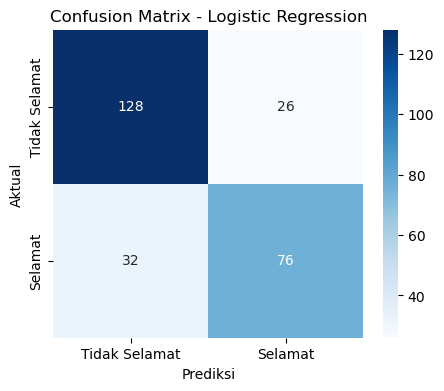

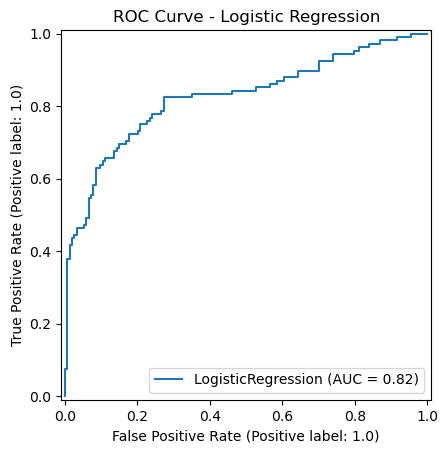

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Tidak Selamat", "Selamat"], yticklabels=["Tidak Selamat", "Selamat"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [23]:
#import model akhir

import joblib

# Simpan model ke file .pkl
joblib.dump(log_model, "logistic_titanic_model.pkl")

print("Model berhasil disimpan sebagai logistic_titanic_model.pkl")

Model berhasil disimpan sebagai logistic_titanic_model.pkl


B. RANDOM FOREST

In [24]:
#Training Model Random Forest
from sklearn.ensemble import RandomForestClassifier
# inisialisasi model
rf_model = RandomForestClassifier(
n_estimators=200,
max_depth=None,# biarkan None agar pohon tumbuh penuh (akan di-regularize oleh n_estimators)
min_samples_split=2,
min_samples_leaf=1,
max_features="sqrt",# umum untuk klasifikasi
class_weight="balanced",# jaga jika kelas agak tidak seimbang
random_state=42,
n_jobs=-1
)

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred1 = rf_model.predict(X_test)
y_pred_proba1 = rf_model.predict_proba(X_test)[:, 1]

In [25]:
# Evaluasi Model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Hitung metrik
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
roc_auc = roc_auc_score(y_test, y_pred_proba1)

print("=== Evaluasi random forest ===")
print(f"Akurasi       : {acc:.3f}")
print(f"Presisi       : {prec:.3f}")
print(f"Recall        : {rec:.3f}")
print(f"F1 Score      : {f1:.3f}")
print(f"ROC AUC Score : {roc_auc:.3f}")
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred1))

=== Evaluasi random forest ===
Akurasi       : 0.798
Presisi       : 0.789
Recall        : 0.694
F1 Score      : 0.739
ROC AUC Score : 0.849

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83       154
         1.0       0.79      0.69      0.74       108

    accuracy                           0.80       262
   macro avg       0.80      0.78      0.79       262
weighted avg       0.80      0.80      0.80       262



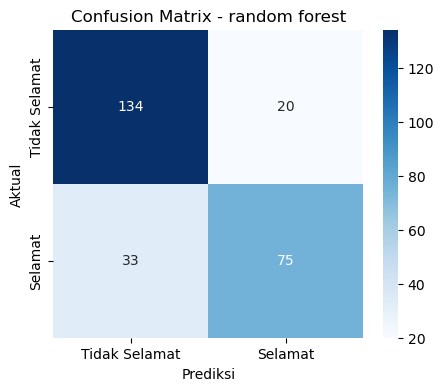

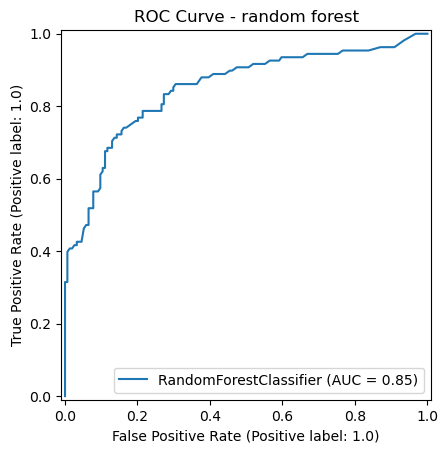

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay

# Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(5,4))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Tidak Selamat", "Selamat"], yticklabels=["Tidak Selamat", "Selamat"])
plt.title("Confusion Matrix - random forest")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve - random forest")
plt.show()

In [27]:
#import model akhir

import joblib

# Simpan model ke file .pkl
joblib.dump(rf_model, "randomforest_titanic_model.pkl")

print("Model berhasil disimpan sebagai randomforest_titanic_model.pkl")

Model berhasil disimpan sebagai randomforest_titanic_model.pkl


C. GRADIAN BOOSTING

In [28]:
# Training Model - HistGradientBoostingClassifier (HGB) 
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(
    learning_rate=0.08,
    max_depth=None,     # biarkan model memilih
    max_iter=400,       # mirip n_estimators
    l2_regularization=0.0,
    random_state=42
)
# Latih model
hgb.fit(X_train, y_train)

# Prediksi pada data test
y_pred2 = hgb.predict(X_test)
y_pred_proba2 = hgb.predict_proba(X_test)[:, 1]

In [29]:
# Evaluasi Model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Hitung metrik
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
rec = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
roc_auc = roc_auc_score(y_test, y_pred_proba2)

print("=== Evaluasi gradian boosting ===")
print(f"Akurasi       : {acc:.3f}")
print(f"Presisi       : {prec:.3f}")
print(f"Recall        : {rec:.3f}")
print(f"F1 Score      : {f1:.3f}")
print(f"ROC AUC Score : {roc_auc:.3f}")
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred2))

=== Evaluasi gradian boosting ===
Akurasi       : 0.786
Presisi       : 0.777
Recall        : 0.676
F1 Score      : 0.723
ROC AUC Score : 0.821

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83       154
         1.0       0.78      0.68      0.72       108

    accuracy                           0.79       262
   macro avg       0.78      0.77      0.77       262
weighted avg       0.79      0.79      0.78       262



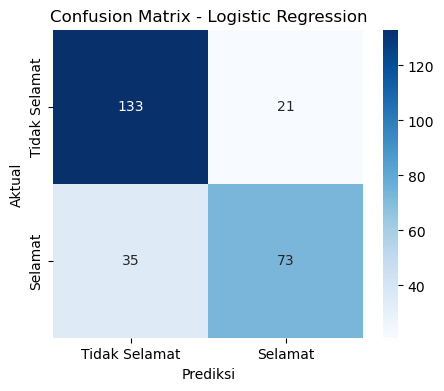

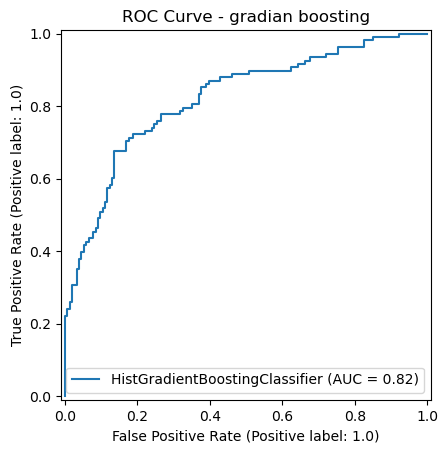

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay

# Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["Tidak Selamat", "Selamat"], yticklabels=["Tidak Selamat", "Selamat"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(hgb, X_test, y_test)
plt.title("ROC Curve - gradian boosting")
plt.show()

In [31]:
#import model akhir

import joblib

# Simpan model ke file .pkl
joblib.dump(hgb, "gradianBoosting_titanic_model.pkl")

print("Model berhasil disimpan sebagai gradianBoosting_titanic_model.pkl")

Model berhasil disimpan sebagai gradianBoosting_titanic_model.pkl
